In [19]:
from keras.utils import to_categorical, np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from skimage.transform import resize
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from keras.models import load_model
import numpy as np 
from keras.preprocessing import image

#### load the data 

In [20]:
cifar = tf.keras.datasets.cifar10        # loading the dataset 'cifar10',   1 time run
(x_train, y_train), (x_test, y_test) = cifar.load_data()

# htload_datas://github.com/keras-team/keras/tree/master/keras/datasets

In [21]:
type(x_train)               # 'x' has the image and 'y' has the label

numpy.ndarray

In [22]:
x_train.shape

(50000, 32, 32, 3)

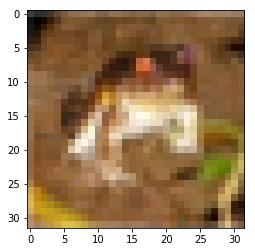

In [23]:
# show image

img = plt.imshow(x_train[0])        # frog

In [24]:
print('label is : ', y_train[0])       # dataset has 10 different labels 0 to 9

label is :  [6]


##### One hot encoding

In [25]:
# convert the labels into set of numbers 10 digits (one hot encoding) of 'y_train' and 'y_test'  sets

y_train = to_categorical(y_train)    # np_utils.to_categorical(y_train)
y_test = to_categorical(y_test)      # np_utils.to_categorical(y_train)

In [26]:
# Now print the same label

print('One hot encoding label : ', y_train_one[0])  
num_classes = y_test.shape[1]

One hot encoding label :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


##### Normalization 

In [27]:
# Normalize the pixels of images b/w  0 and 1  'x_train', 'x_test' set  ,  from 0-255 to 0.0-1.0

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0

##### Build the model

In [29]:
model = Sequential()   # create architecture

# CNN layer 2D
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 

model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
# maxpooling layer , pool_size is like if we give image 32x32 it create into 16x16
model.add(MaxPooling2D(pool_size=(2, 2))) 

# again create CNN and maxpooling layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

# flatten layer, flatten is making a image 1D array/vector
model.add(Flatten()) 
model.add(Dropout(0.2)) 

model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(num_classes, activation='softmax'))

##### Conv2D : 2-dimensional convolutional layer.
32 is the number of filters needed. A filter is an array of numeric values.                                              
(3,3) is the size of the filter, which means 3 rows and 3 columns.                                                         
input image is 32*32*3 size (32 height, 32 widths, and 3 refer to RGB values)                                               
The output of this layer will be some feature maps. A feature map is a map that shows some specific features of the image.    
Dropout layer in our model to prevent overfitting.                                                                          
MaxPooling layer : used for pooling, reduces the dimensionality of each feature map but retains the important information.   
activation function : of a neuron defines the output of that neuron, given some input.                                      
This output is then used as input for the next neuron and so on until the desired solution is obtained.                      
ReLU replaces all the negative pixel values in the feature map with 0.                                                       
Softmax takes as input a vector of K real numbers and normalizes it into a probability distribution consisting of K        pobabilities proportional to the exponentials of the input numbers. 

In [30]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_18 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_19 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        36928     
__________

#### compile the model

In [32]:
lrate = 0.01 
sgd = SGD(lr=lrate, momentum=0.9, nesterov=False) 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

##### Train / fit the model 

In [33]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test,y_test))  # validation_split=0.3

W0223 12:22:58.186407  3172 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2091s 42ms/step - loss: 1.8766 - acc: 0.3031 - val_loss: 1.5961 - val_acc: 0.4288
Epoch 2/10
50000/50000 [==============================] - 2323s 46ms/step - loss: 1.4251 - acc: 0.4837 - val_loss: 1.2467 - val_acc: 0.5486
Epoch 3/10
50000/50000 [==============================] - 1426s 29ms/step - loss: 1.1944 - acc: 0.5716 - val_loss: 1.0140 - val_acc: 0.6420
Epoch 4/10
50000/50000 [==============================] - 1343s 27ms/step - loss: 1.0363 - acc: 0.6345 - val_loss: 0.9800 - val_acc: 0.6524
Epoch 5/10
50000/50000 [==============================] - 1967s 39ms/step - loss: 0.9198 - acc: 0.6748 - val_loss: 0.8686 - val_acc: 0.6978
Epoch 6/10
50000/50000 [==============================] - 2023s 40ms/step - loss: 0.8352 - acc: 0.7060 - val_loss: 0.8188 - val_acc: 0.7204
Epoch 7/10
50000/50000 [==============================] - 1623s 32ms/step - loss: 0.7719 - acc: 0.7292 - val_l

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.767182). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 2345s 47ms/step - loss: 0.6444 - acc: 0.7764 - val_loss: 0.7434 - val_acc: 0.7521


##### evaluation of the model

In [37]:
# get the model accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy : {score[1] : 0.2%}")

# model.evaluate(x_test, y_test)[1]

Accuracy :  75.21%


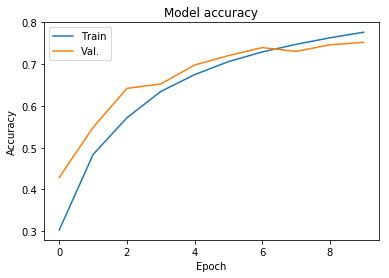

In [38]:
# visualize the models accuracy

plt.plot(hist.history['acc'])       # accuracy on the training data
plt.plot(hist.history['val_acc'])   #  validation accuracy

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val.'], loc='best')
plt.show()

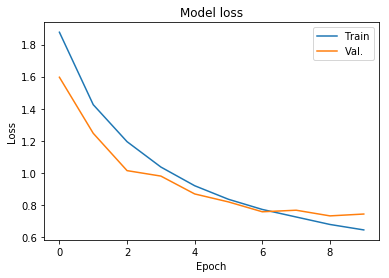

In [39]:
# visualize the models loss

plt.plot(hist.history['loss'])       # accuracy on the training data
plt.plot(hist.history['val_loss'])   #  validation accuracy

plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val.'], loc='best')
plt.show()

#### save the model

In [40]:
from keras.models import load_model

model.save('project_model.h5')

##### It creates an HDF5 file with the name 'project_model'  and extension '.h5'.  Hierarchical Data Format (HDF) is a set of file formats (HDF4, HDF5) designed to store and organize large amounts of data.

#### Load the model

In [41]:
model = load_model('project_model.h5')

## -----------------

#### Testing the Model with some random input images

##### load the data image

In [59]:
import numpy as np 
from keras.preprocessing import image

test_image = image.load_img('c1.jpg', target_size=(32,32))

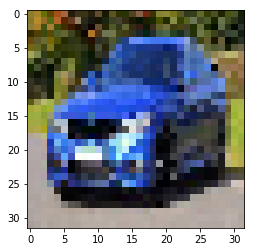

In [60]:
%matplotlib inline 
import matplotlib.pyplot as plt  

plt.imshow(test_image)                   # 32x32 image

In [61]:
test_image =image.img_to_array(test_image) 
test_image =np.expand_dims(test_image, axis =0) 
result = model.predict(test_image) 
print(result)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [62]:
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

Automobile
